# Regression Objective

```{figure} /images/regression/houses.jpg
---
height: 300px
name: houses
align: center
---
Example for Regression: Prediction of House Prices
```
Regression is a fundamental task in data mining and machine learning that aims to predict a continuous target variable from input features. A typical applications is the prediction of prices, which we explore by means of the  California Housing Price Dataset. This dataset contains housing data from California districts in the 1990s and is commonly used to predict house prices based on features like median income, location, and average number of rooms. Our goal is to build a model that can accurately predict house prices based on these features. We can easily load this dataset using sklearn.

In [2]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [3]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

We load the dataset as the data matrix $D$ and the target vector $\vvec{y}$.

In [4]:
D = california.data
y = california.target
n,d = D.shape

A snapshot of this dataset is given below.

In [21]:
import pandas as pd
df = pd.DataFrame(D,columns=california.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


The target vector is continuous:

In [22]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

The goal is to predict the **target** $y$ given a **feature vector** $\vvec{x}$ by means of a regression function 
$f(\vvec{x})\approx y$. In our example, the function should map from an eight dimensional vector space to the real values. This way, we formally define the regression task.

`````{admonition} Task (Regression)
:class: tip
**Given** a dataset consisting of $n$ observations
    $$\mathcal{D}=\left\{(\vvec{x}_i,y_i)\vert \vvec{x}_{i}\in\mathbb{R}^{d}, y_i\in\mathbb{R}, 1\leq i \leq n\right\}$$

**Find** a regression function $f:\mathbb{R}^ d\rightarrow \mathbb{R}$, $f\in\mathcal{F}$ that captures the relationship between observations and target, yielding in particular  $f(\vvec{x}_i)\approx y_i$ for all $1\leq i \leq n$.
`````
The _underlying assumption_ is that every observation $(\vvec{x}_i,y_i)$ is generated by the _true_ model function $f^*$ and noise:
$$y_i=f^*(\vvec{x}_i)+\epsilon_i$$

The noise should have an expected value of zero and models errors in measurement, or natural fluctuations of the target. If the noise would have a systematic bias and an expected value not equal to zero, then we wouldn't be able to find $f^*$, because all our observation measurements are biased. So, for evaluation purposes, we assume that the expected value of the noise is zero and as a result, the expected value of the target is the function value of $f^*$. 
In theory, if we would have multiple measurements for each possible feature vector, we could predict the mean target value for the observations of the given feature values would therewith have an estimator for $f^*$. In practice, the observations are scattered over the feature space.     

We plot the first feature value of the California housing dataset against the target to get a small visual example for the regression task. In this example, we want to predict the housing price for any value of the first feature `MedInc` (the median income in the block group).

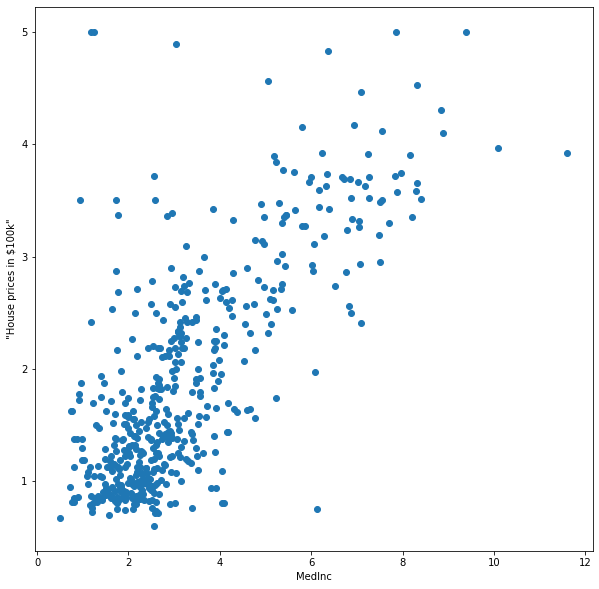

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
k=0
plt.scatter(D[0:500,k], y[0:500])
plt.xlabel(california.feature_names[k])
plt.ylabel('"House prices in $100k"')
plt.show()

A fundamental question in regression is how to model this point cloud with an approximating function. We determine the kind of functions that can be learned by deciding on a class of functions that we deem reasonable for a given dataset. The function class has a fixed functional form but depend on one or more adjustable parameters. We fit then the regression function to the given data by optimizing the parameters. A possible function class could be, for example, the set of all linear functions. If we choose this function class for the example above, then we would approximate the point cloud with a straight line. This is for most cases very restrictive, also the example above shows a small curvature that would be neglected with this function class choice. The advantage of this function class is however that it has an easy form and that it is easy to optimize. Luckily, as we will discuss in the next post, even nonlinear relations can be modelled as linear relations by applying a feature transformation.   